# Neural network - MultiLayer Perceptron

## importy

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from data_encoder import encode_data
import seaborn as sns
import matplotlib.pyplot as plt

## dane

In [8]:
network_data = pd.read_csv('dataset_sdn.csv')
network_data = network_data.dropna()
ip_encoding = 3  # one hot
X_train, X_test, y_train, y_test = encode_data(network_data, ip_encoding, drop=True)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## uczenie modelu

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     18952
         1.0       1.00      0.99      0.99     12048

    accuracy                           0.99     31000
   macro avg       0.99      0.99      0.99     31000
weighted avg       0.99      0.99      0.99     31000



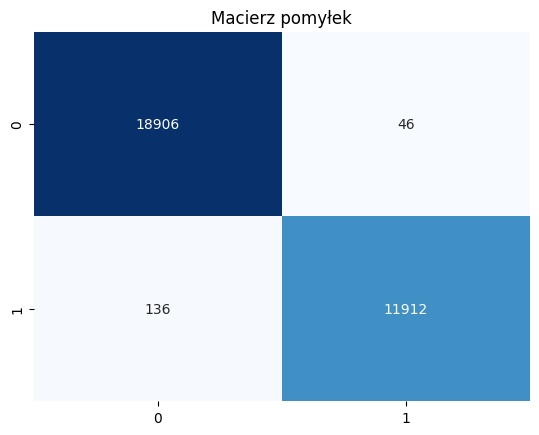

In [9]:
hidden_layer_sizes = (10, 10)
activation = 'tanh'
solver = 'sgd'
learning_rate_init = 0.01
mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation=activation, solver=solver, learning_rate_init=learning_rate_init, max_iter=500)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
report = classification_report(y_test, y_pred)

print(report)
sns.heatmap(confusion_matrix(y_test, y_pred), fmt="d", annot=True, cmap='Blues', cbar=False)
plt.title('Macierz pomyłek')
plt.show()